# Generate CyRSoXS files
* Load morphology data as numpy arrays
* Add relevant parameters for Euler Morphology structure
* Save morphology hdf5
* Load optical constants data for materials
* Write optical constants to correctly formatted .txt files
* Write configuration file for CyRSoXS simulation instructions 

In [60]:
### Imports:
import numpy as np
import matplotlib.pyplot as plt
import sys
import pathlib
from skimage.filters import sobel_v, sobel_h, sobel, gaussian

# import PyHyperScattering as phs
# from PyHyperScattering.load import cyrsoxsLoader as load
# from PyHyperScattering.integrate import WPIntegrator as integ
# print(f'Using PyHyperScattering version: {phs.__version__}')

sys.path.append('/Users/andrew/onedriveCU/research/data_analysis/repos/NRSS')
from NRSS.writer import write_materials, write_hdf5, write_config, write_slurm
from NRSS.visualizer import morphology_visualizer
from NRSS.morphology import Morphology

In [2]:
### Define paths:
notebookPath = pathlib.Path.cwd()
rootPath = notebookPath.parent
morphsPath = notebookPath.joinpath('fipy_morphs/2D')
optsPath = rootPath.joinpath('nexafs_analysis/optical_constants')

### Set colormap:
cmap = plt.cm.YlGnBu_r.copy()

In [7]:
sorted([f.name for f in optsPath.glob('*')])

['.ipynb_checkpoints',
 'PM6_difxns.svg',
 'PM6_molecular.txt',
 'Y6_difxns.svg',
 'Y6_molecular.txt']

In [6]:
sorted([f.name for f in morphsPath.glob('*steps*.txt')])

['100x100pix_100x100size_210steps_D2_a1_epsilon1.txt',
 '100x100pix_100x100size_210steps_D2_a1_epsilon1_binary.txt',
 '200x200pix_100x100size_500steps_D1_a1_epsilon1.txt',
 '200x200pix_100x100size_500steps_D1_a1_epsilon1_binary.txt',
 '200x200pix_300x300size_1600steps_D1_a1_epsilon1.txt',
 '200x200pix_300x300size_1600steps_D1_a1_epsilon1_binary.txt',
 '350x350pix_500x500size_500steps_D1_a1_epsilon1.txt',
 '350x350pix_500x500size_500steps_D1_a1_epsilon1_binary.txt']

In [14]:
morph = np.loadtxt(list(morphsPath.glob('350*500steps*1.txt'))[0])
morph_bin = np.loadtxt(list(morphsPath.glob('350*500steps*y.txt'))[0])

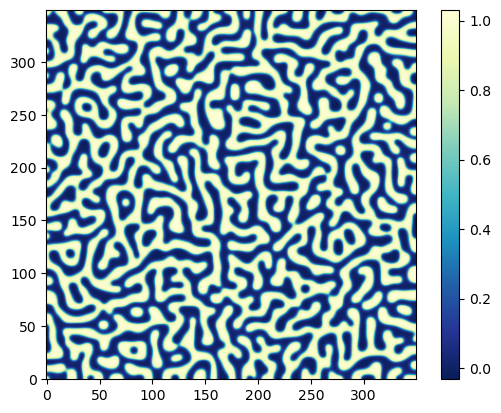

In [18]:
plt.imshow(morph, origin='lower', cmap=cmap)
plt.colorbar()

In [48]:
### Define volume fraction, S, theta, and psi arrays. Let mat1 be the donor and mat2 be the acceptor:
mat1_vfrac = morph
mat1_S = np.zeros(morph.shape)
mat1_theta = np.zeros(morph.shape)
mat1_psi = np.zeros(morph.shape)

mat2_vfrac = 1-morph
mat2_S = np.zeros(morph.shape)
mat2_theta = np.zeros(morph.shape)
mat2_psi = np.zeros(morph.shape)

In [49]:
### Reshape to (Z, Y, X):
mat1_vfrac = np.reshape(mat1_vfrac, (1, morph.shape[1], morph.shape[0]))
mat1_S = np.reshape(mat1_S, (1, morph.shape[1], morph.shape[0]))
mat1_theta = np.reshape(mat1_theta, (1, morph.shape[1], morph.shape[0]))
mat1_psi = np.reshape(mat1_psi, (1, morph.shape[1], morph.shape[0]))

mat2_vfrac = np.reshape(mat2_vfrac, (1, morph.shape[1], morph.shape[0]))
mat2_S = np.reshape(mat2_S, (1, morph.shape[1], morph.shape[0]))
mat2_theta = np.reshape(mat2_theta, (1, morph.shape[1], morph.shape[0]))
mat2_psi = np.reshape(mat2_psi, (1, morph.shape[1], morph.shape[0]))


In [50]:
write_hdf5([[mat1_vfrac, mat1_S, mat1_theta, mat1_psi], [mat2_vfrac, mat2_S, mat2_theta, mat2_psi]],
           PhysSize=1.0, fname=H5morphPath.joinpath('350x350pix_500x500size_500steps_D1_a1_epsilon1.hdf5'))

--> Marking /Users/andrew/Library/CloudStorage/OneDrive-UCB-O365/research/data_analysis/rsoxs_suite/morph_gen/sim_morphs/350x350pix_500x500size_500steps_D1_a1_epsilon1.hdf5


PosixPath('/Users/andrew/Library/CloudStorage/OneDrive-UCB-O365/research/data_analysis/rsoxs_suite/morph_gen/sim_morphs/350x350pix_500x500size_500steps_D1_a1_epsilon1.hdf5')

Dataset dimensions (Z, Y, X): 1 x 350 x 350
Number of Materials: 2

Material 1 Vfrac. Min: -0.032514938290305107 Max: 1.0315769953138398
Material 1 S. Min: 0.0 Max: 0.0
Material 1 theta. Min: 0.0 Max: 0.0
Material 1 psi. Min: 0.0 Max: 0.0


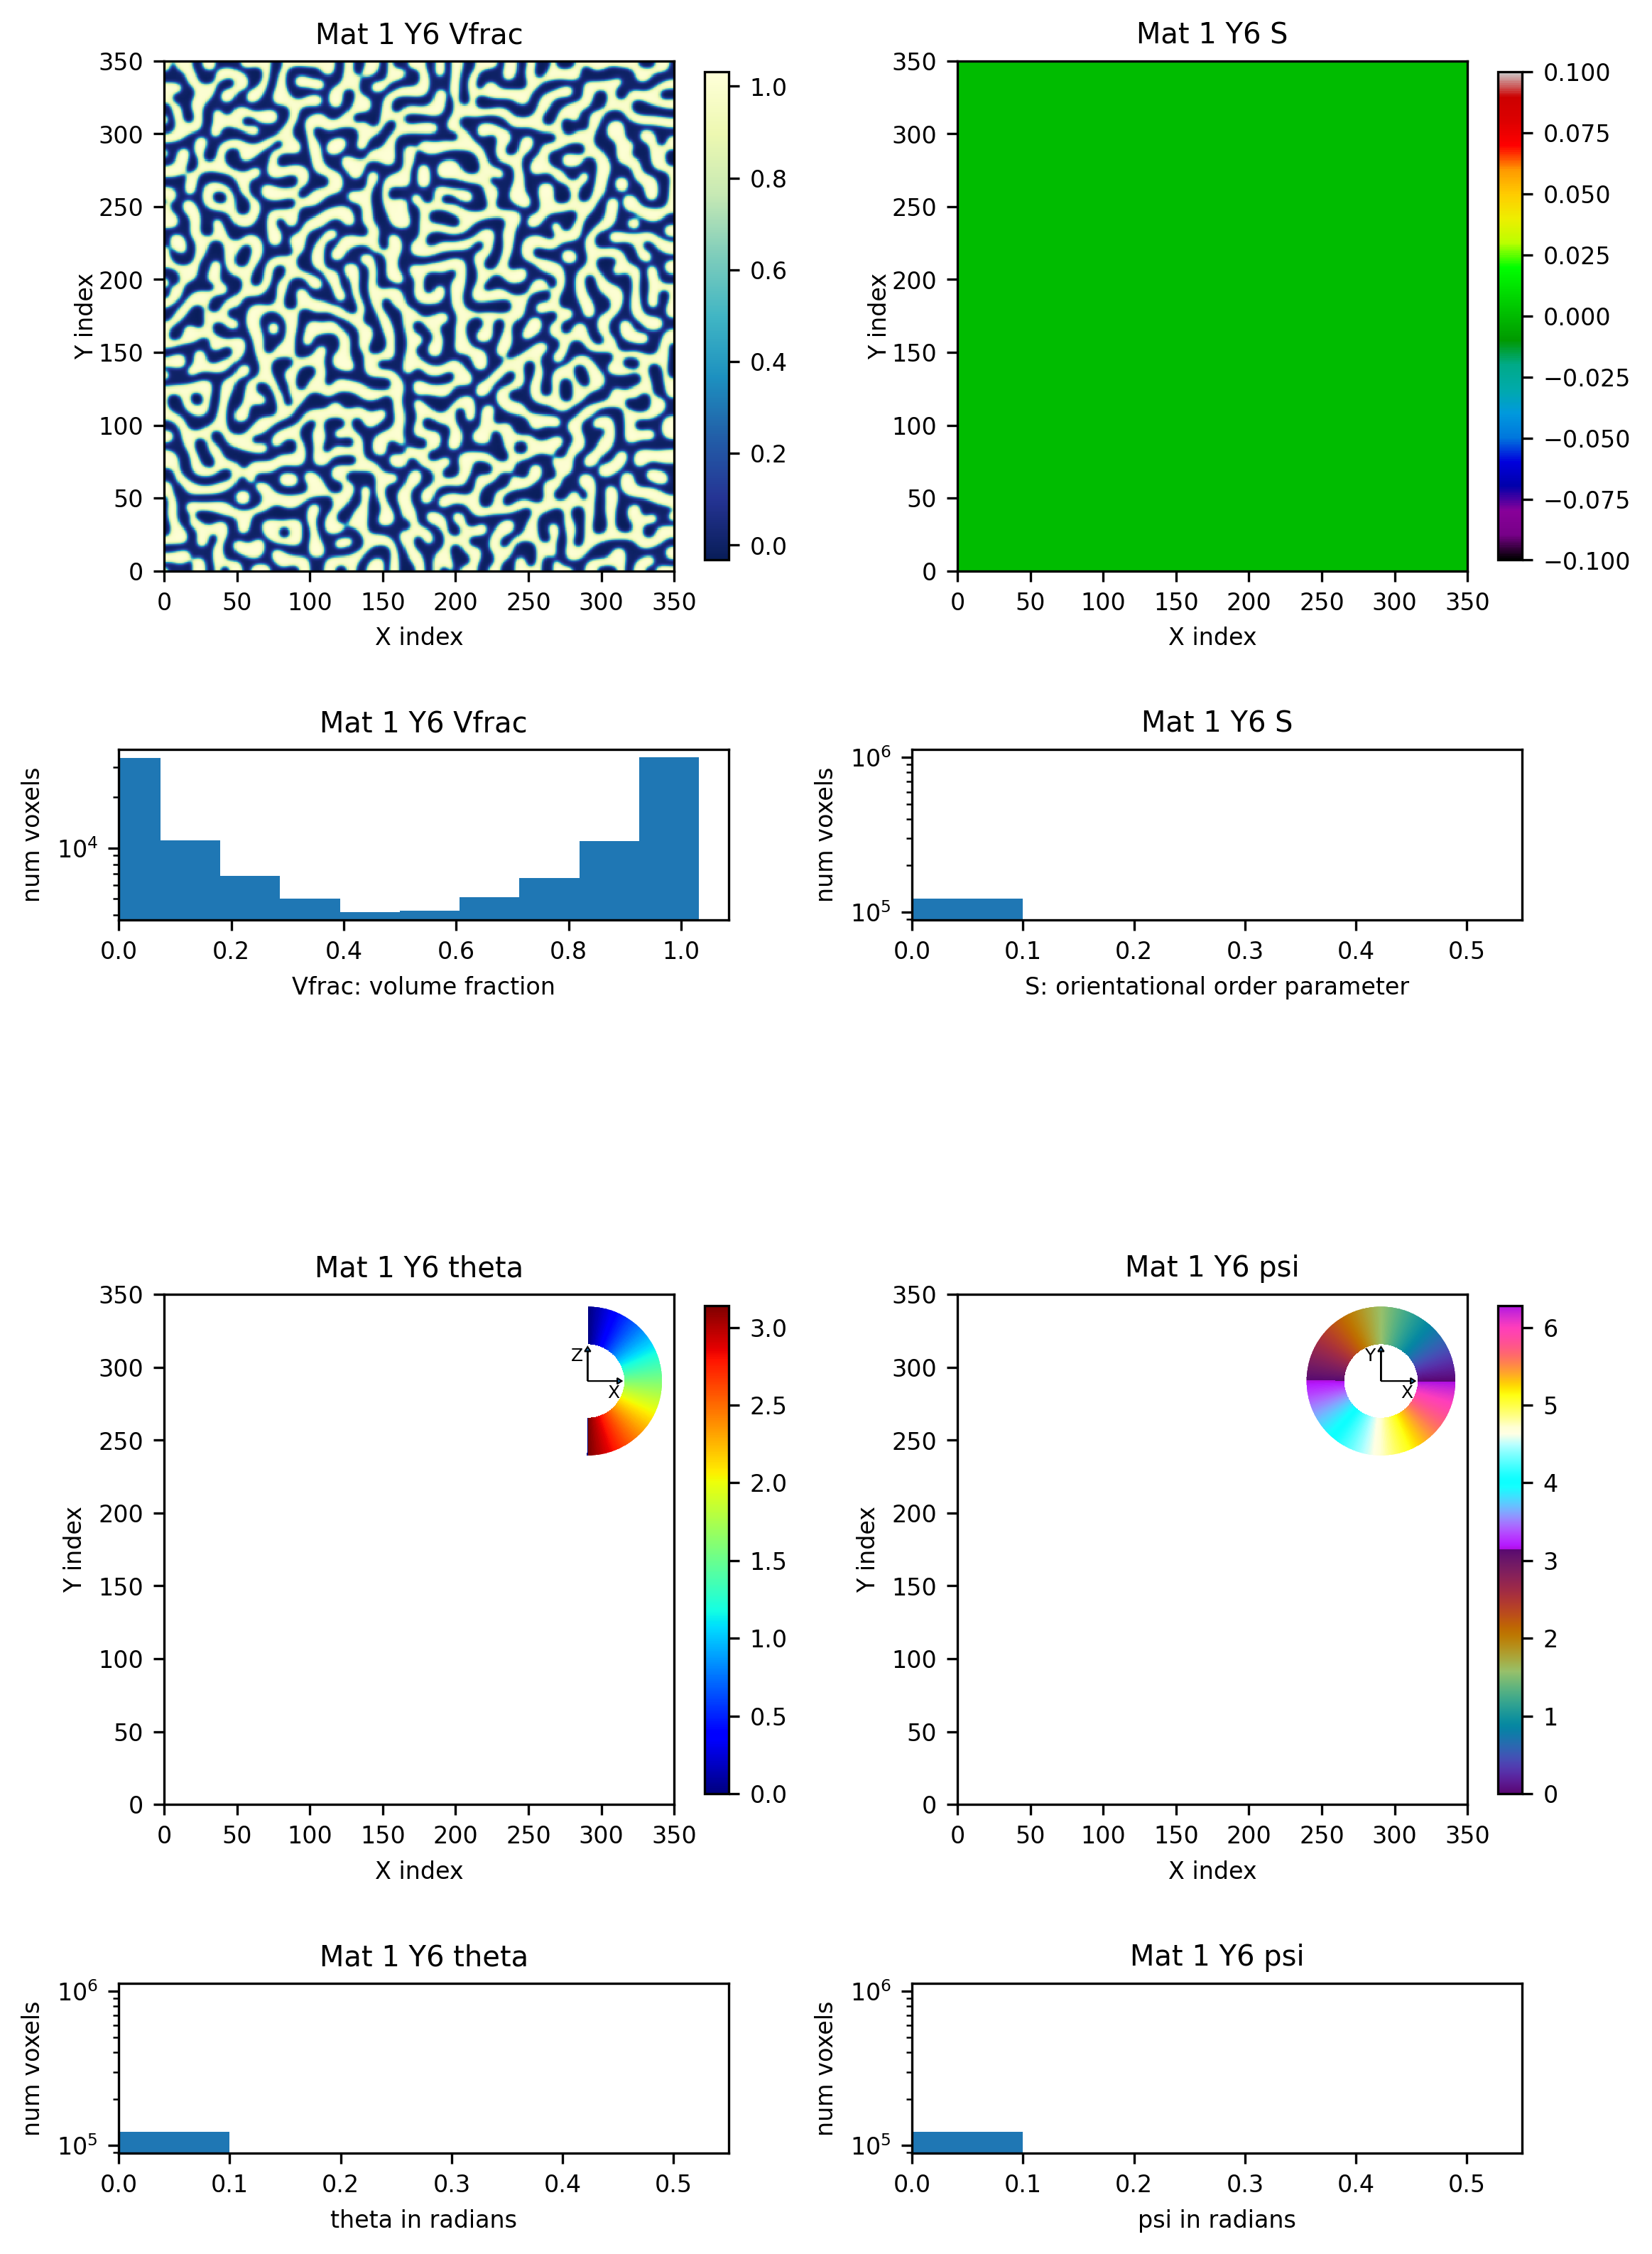

Material 2 Vfrac. Min: -0.03157699531383984 Max: 1.0325149382903052
Material 2 S. Min: 0.0 Max: 0.0
Material 2 theta. Min: 0.0 Max: 0.0
Material 2 psi. Min: 0.0 Max: 0.0


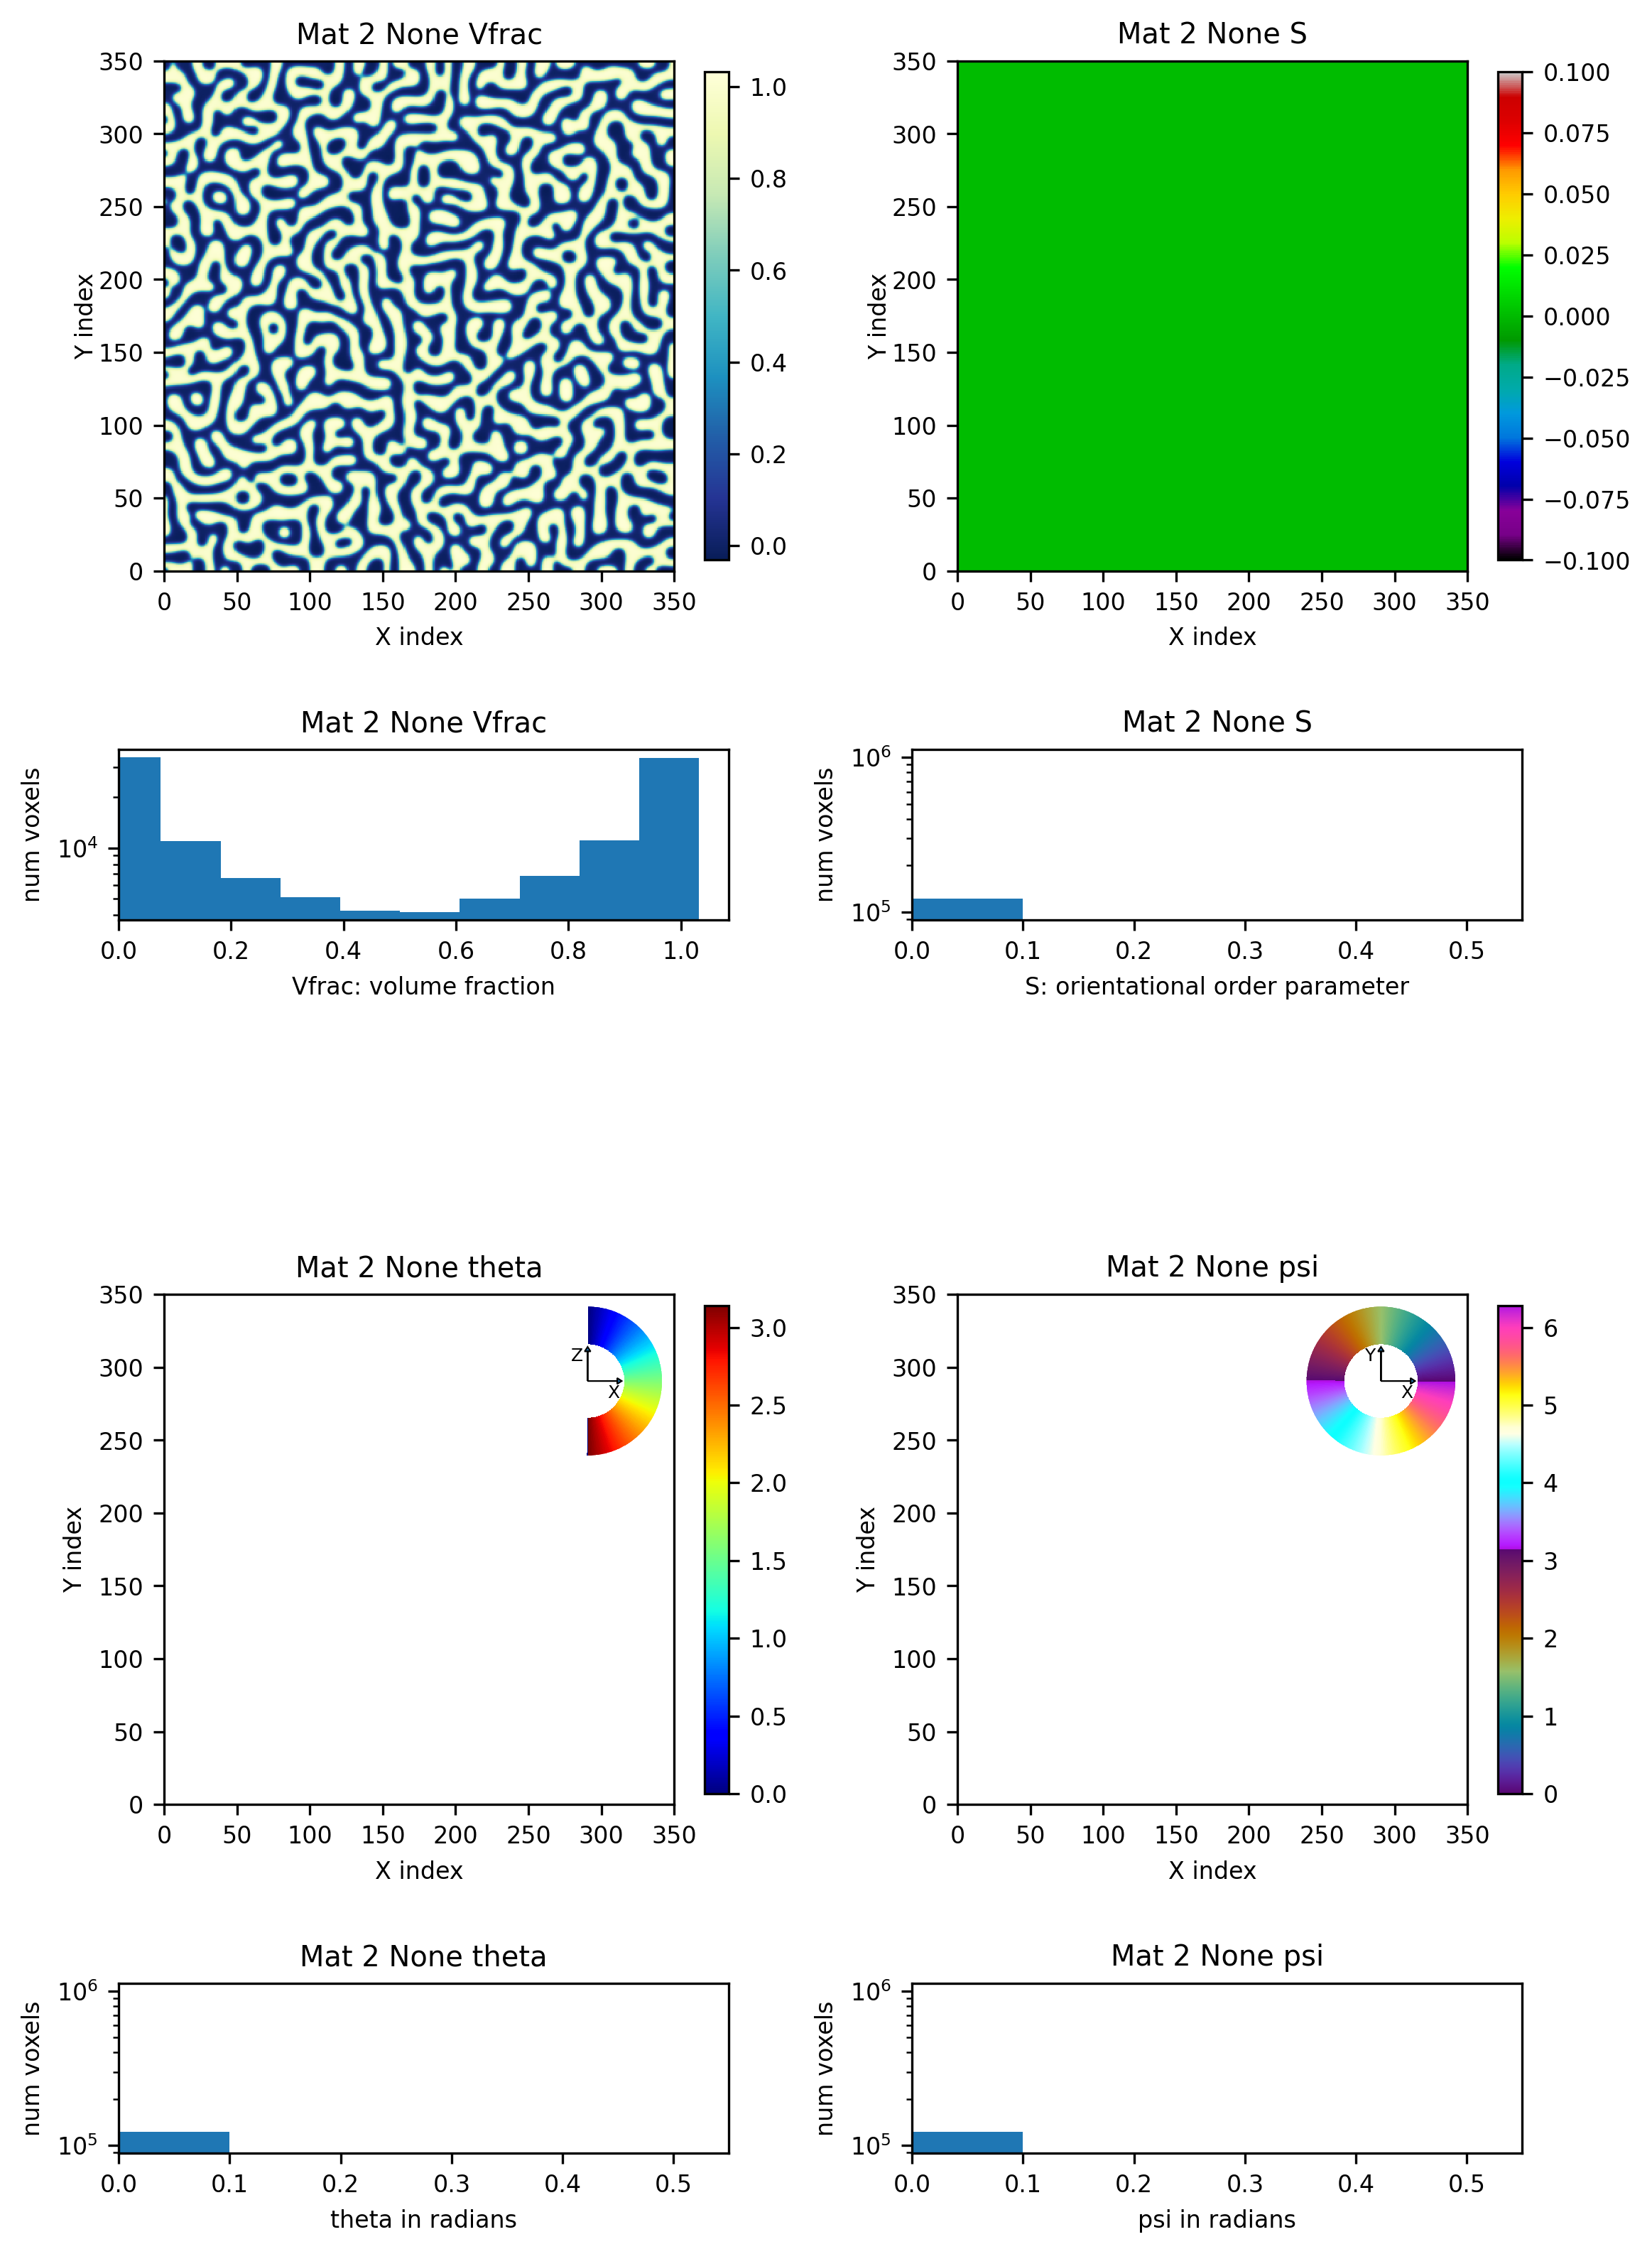

[]

<Figure size 640x480 with 0 Axes>

In [86]:
morph_obj = Morphology.load_morph_hdf5(H5morphPath.joinpath('350x350pix_500x500size_500steps_D1_a1_epsilon1.hdf5'))
morph_obj.materials[1].name = 'PM6'
morph_obj.materials[1].name = 'Y6'
morphology_visualizer(morph_obj, vfrac_cmap=cmap)

In [92]:
energies = np.round(np.arange(275,300,0.1),1)

material_dict = {'Material1': optsPath.joinpath('PM6_molecular.txt'), 
                 'Material2': optsPath.joinpath('Y6_molecular.txt')}
energy_dict = {
    'Energy': 0,
    'DeltaPara': 1,
    'BetaPara': 2,
    'DeltaPerp': 3,
    'BetaPerp': 4
}

write_materials(energies, material_dict, energy_dict, 2)